In [1]:
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box

misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/ieee123.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee123busdata/breakpoints.csv'

start = 100
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=0.4)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'unbalanced_fixed_controller'

from pycigar.envs.new_exp_envs.envs import ExpCentralControlPhaseSpecificPVInverterEnv
policy = "/home/toanngo/oscillation_ieee123_unbalance/main/run_train/run_train_1_T=150,lr=0.0004_2020-11-20_03-16-262pefpizn/best/policy_600"
env = ExpCentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
env.reset()
done = False

for _ in range(150):
    _, r, done, _ = env.step([10, 10, 10])

for _ in range(15):
    _, r, done, _ = env.step([5, 10, 10])


for _ in range(100):
    _, r, done, _ = env.step([10, 10, 10])

while not done:
    _, r, done, _ = env.step([10, 10, 10])

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
3

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


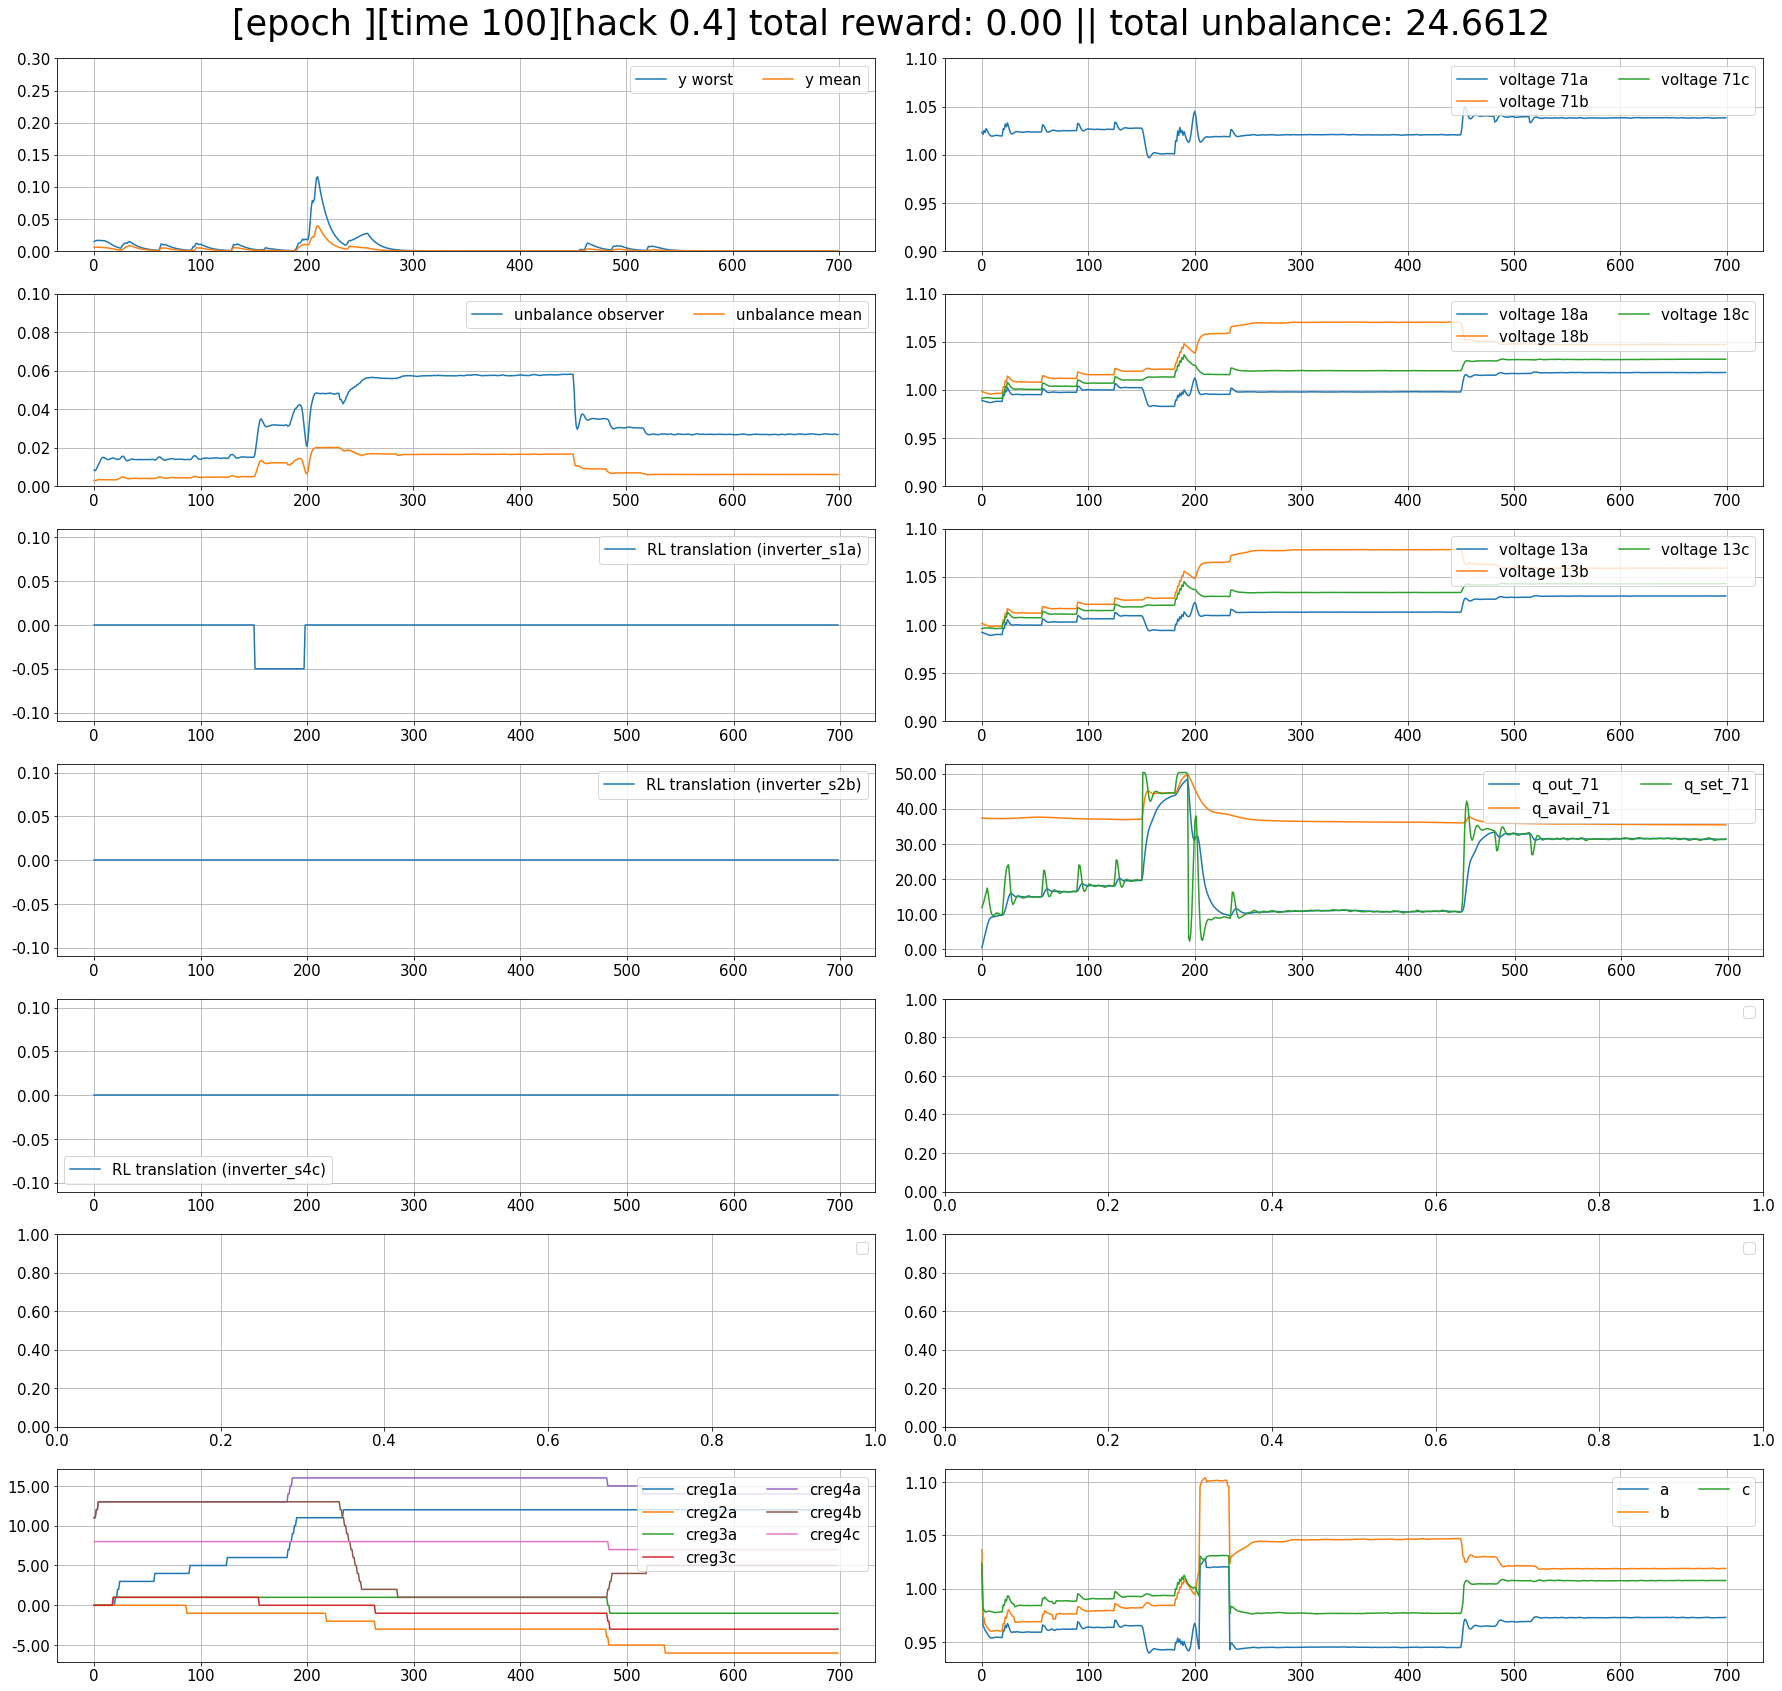

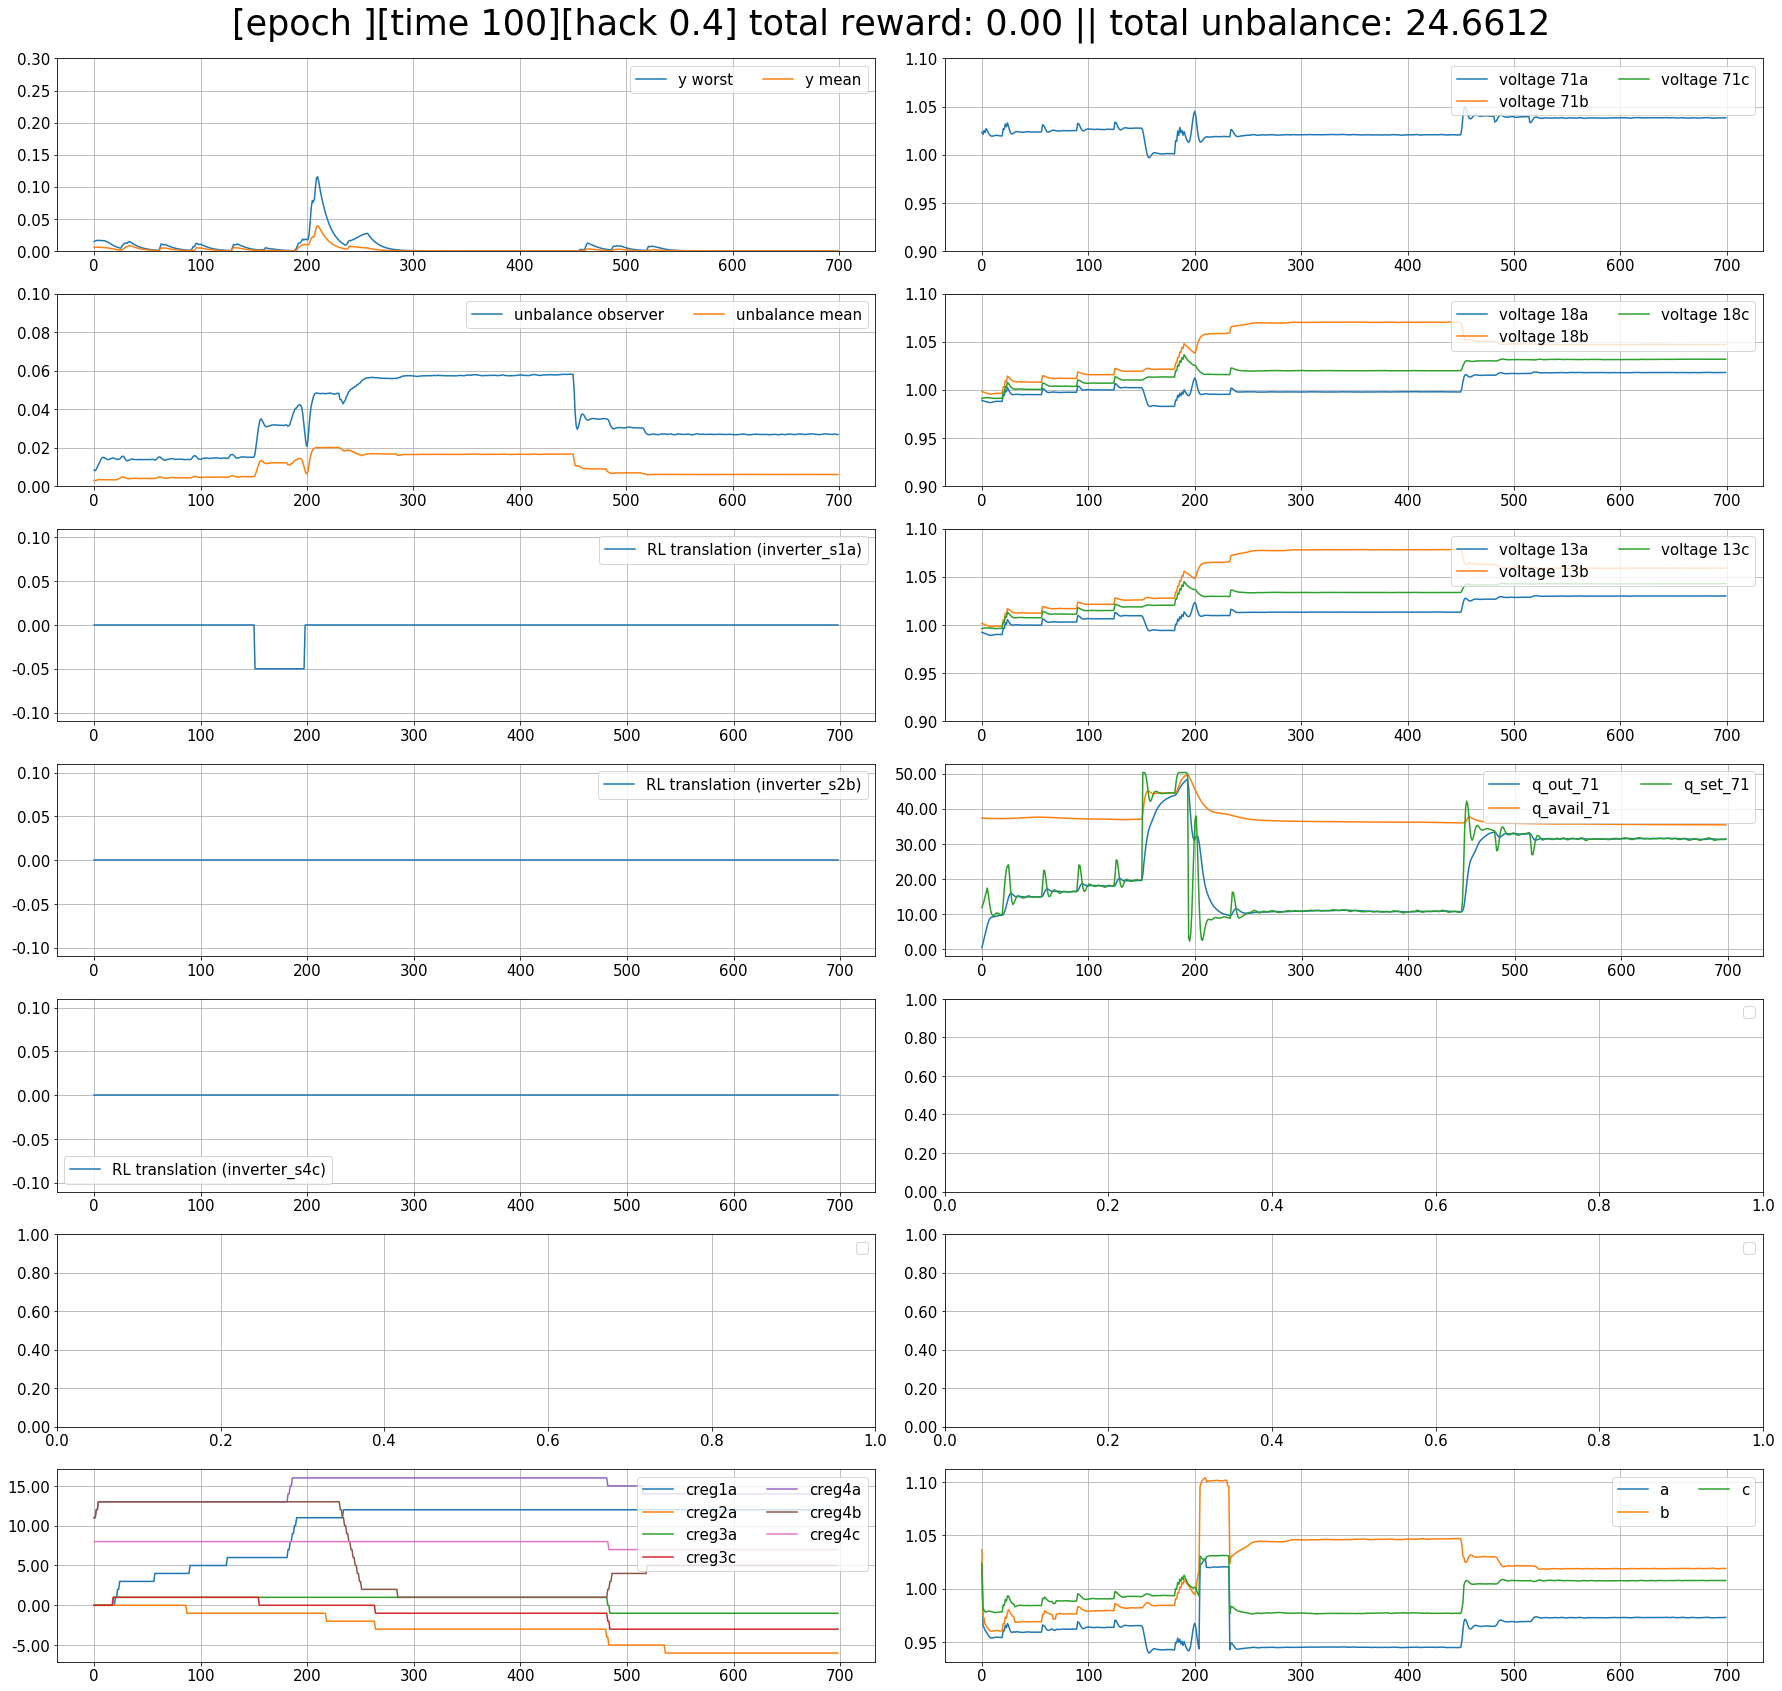

In [2]:
from pycigar.utils.logging import logger
import matplotlib.pyplot as plt
from pycigar.utils.output import plot_new
log_dict = logger().log_dict
custom_metrics = logger().custom_metrics
plot_new(log_dict, custom_metrics, epoch='', unbalance=False, multiagent=False)